# Skin Cancer Image Processing and Baseline Model

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from keras import models
from keras import layers
np.random.seed(123)

In [2]:
!ls ../data

Additional_malignant
ISIC_2019_512x512
ISIC_2019_512x512.csv
ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
ISIC_FINAL_DATASET.csv
add_train_malig_2.csv


In [3]:
# Reading in the final dataset from Data_Exploration.ipynb
df = pd.read_csv('../data/ISIC_FINAL_DATASET.csv')
df

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path,lesion_id,width,height,source,ext,tfrecord
0,0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58779,58779,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,../data/Additional_malignant/ISIC_0024302.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58780,58780,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024303.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58781,58781,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024304.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58782,58782,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024305.jpg,NaN,4288.0,2848.0,2018 JID Editorial Images,jpg,29.0


In [4]:
# Define X and y 
X = df[['image_name', 'path', 'sex', 'age_approx', 'anatom_site_general_challenge']]
y = df['benign_malignant']

In [5]:
X

,image_name,path,sex,age_approx,anatom_site_general_challenge
0,ISIC_2637011,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,male,45.0,head/neck
1,ISIC_0015719,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,female,45.0,upper extremity
2,ISIC_0052212,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,female,50.0,lower extremity
3,ISIC_0068279,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,female,45.0,head/neck
4,ISIC_0074268,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,female,55.0,upper extremity
...,...,...,...,...,...
58779,ISIC_0024302,../data/Additional_malignant/ISIC_0024302.jpg,female,25.0,NaN
58780,ISIC_0024303,../data/Additional_malignant/ISIC_0024303.jpg,male,60.0,NaN
58781,ISIC_0024304,../data/Additional_malignant/ISIC_0024304.jpg,male,70.0,NaN
58782,ISIC_0024305,../data/Additional_malignant/ISIC_0024305.jpg,male,85.0,NaN


In [6]:
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [7]:
# Regular Train - Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [8]:
# Train dataframe
df_tr = pd.concat([X_tr, y_tr], axis=1)
print(f'Train dataset: \n {df_tr.benign_malignant.value_counts()}')
df_tr

Train dataset: 
 benign       35386
malignant     6938
Name: benign_malignant, dtype: int64


,image_name,path,sex,age_approx,anatom_site_general_challenge,benign_malignant
9434,ISIC_2925481,../data/ISIC_2020_Training_JPEG/ISIC_2925481.jpg,female,50.0,lower extremity,benign
22571,ISIC_6847618,../data/ISIC_2020_Training_JPEG/ISIC_6847618.jpg,female,50.0,torso,benign
20461,ISIC_6225557,../data/ISIC_2020_Training_JPEG/ISIC_6225557.jpg,female,55.0,torso,benign
18738,ISIC_5689428,../data/ISIC_2020_Training_JPEG/ISIC_5689428.jpg,female,45.0,lower extremity,benign
26607,ISIC_8065339,../data/ISIC_2020_Training_JPEG/ISIC_8065339.jpg,female,50.0,torso,benign
...,...,...,...,...,...,...
34,ISIC_0086632,../data/ISIC_2020_Training_JPEG/ISIC_0086632.jpg,male,40.0,torso,benign
49365,ISIC_0059066,../data/ISIC_2019_Training_Input/ISIC_0059066.jpg,male,55.0,anterior torso,malignant
27016,ISIC_8185167,../data/ISIC_2020_Training_JPEG/ISIC_8185167.jpg,female,65.0,palms/soles,benign
45712,ISIC_0034129,../data/ISIC_2019_Training_Input/ISIC_0034129.jpg,male,60.0,NaN,benign


In [9]:
# Test dataframe
df_te = pd.concat([X_te, y_te], axis=1)
print(f'Test dataset: \n {df_te.benign_malignant.value_counts()}')
df_te

Test dataset: 
 benign       8846
malignant    1735
Name: benign_malignant, dtype: int64


,image_name,path,sex,age_approx,anatom_site_general_challenge,benign_malignant
3750,ISIC_1233016,../data/ISIC_2020_Training_JPEG/ISIC_1233016.jpg,female,45.0,torso,benign
48547,ISIC_0057785,../data/ISIC_2019_Training_Input/ISIC_0057785.jpg,male,75.0,upper extremity,benign
10510,ISIC_3249783,../data/ISIC_2020_Training_JPEG/ISIC_3249783.jpg,male,35.0,upper extremity,benign
11115,ISIC_3427677,../data/ISIC_2020_Training_JPEG/ISIC_3427677.jpg,female,45.0,upper extremity,benign
29627,ISIC_8962773,../data/ISIC_2020_Training_JPEG/ISIC_8962773.jpg,male,50.0,upper extremity,benign
...,...,...,...,...,...,...
16877,ISIC_5162699,../data/ISIC_2020_Training_JPEG/ISIC_5162699.jpg,female,50.0,torso,benign
12251,ISIC_3768804,../data/ISIC_2020_Training_JPEG/ISIC_3768804.jpg,female,45.0,lower extremity,benign
43136,ISIC_0031507,../data/ISIC_2019_Training_Input/ISIC_0031507.jpg,male,65.0,NaN,benign
15427,ISIC_4722884,../data/ISIC_2020_Training_JPEG/ISIC_4722884.jpg,male,55.0,torso,benign


In [10]:
# Hold-out dataframe:
df_hold = pd.concat([X_hold, y_hold], axis=1)
print(f'Hold-out dataset: \n {df_hold.benign_malignant.value_counts()}')
df_hold

Hold-out dataset: 
 benign       4915
malignant     964
Name: benign_malignant, dtype: int64


,image_name,path,sex,age_approx,anatom_site_general_challenge,benign_malignant
4856,ISIC_1560455,../data/ISIC_2020_Training_JPEG/ISIC_1560455.jpg,female,50.0,lower extremity,benign
26256,ISIC_7969673,../data/ISIC_2020_Training_JPEG/ISIC_7969673.jpg,female,45.0,lower extremity,benign
7187,ISIC_2248231,../data/ISIC_2020_Training_JPEG/ISIC_2248231.jpg,male,55.0,torso,benign
54145,ISIC_0066776,../data/ISIC_2019_Training_Input/ISIC_0066776.jpg,female,85.0,lower extremity,malignant
10518,ISIC_3251421,../data/ISIC_2020_Training_JPEG/ISIC_3251421.jpg,male,55.0,upper extremity,benign
...,...,...,...,...,...,...
50860,ISIC_0061478,../data/ISIC_2019_Training_Input/ISIC_0061478.jpg,female,10.0,lower extremity,benign
47994,ISIC_0056875,../data/ISIC_2019_Training_Input/ISIC_0056875.jpg,male,75.0,head/neck,malignant
21759,ISIC_6588881,../data/ISIC_2020_Training_JPEG/ISIC_6588881.jpg,male,55.0,torso,benign
30088,ISIC_9091415,../data/ISIC_2020_Training_JPEG/ISIC_9091415.jpg,male,60.0,lower extremity,benign


In [18]:
# Instantiating a generator object and normalizing the RGB values, and creating the generator:

# Creating the generator for the training data
train_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(df_tr,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             # Re-sizing images to 64x64
                                                                             target_size=(64, 64),
                                                                             batch_size= int(len(df_tr)/5))

# Creating the generator for the testing data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(df_te,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             # Re-sizing images to 64x64
                                                                             target_size=(64, 64), 
                                                                             batch_size= int(len(df_te)/5))
# Setting aside a hold-out set
hold_generator =  ImageDataGenerator(rescale=1./255).flow_from_dataframe(df_hold,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             # Re-sizing images to 64x64
                                                                             target_size=(64, 64),
                                                                             batch_size= int(len(df_hold)/5))


Found 42324 validated image filenames belonging to 2 classes.
Found 10581 validated image filenames belonging to 2 classes.
Found 5879 validated image filenames belonging to 2 classes.


In [19]:
# This cell took ~20 min to run!
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
hold_images, hold_labels = next(hold_generator)

In [20]:
# Check classes
print(f"Train data set classes, {train_generator.class_indices}")
print(f"Test data set classes, {test_generator.class_indices}")
print(f"Hold-out data set classes, {hold_generator.class_indices}")

Train data set classes, {'benign': 0, 'malignant': 1}
Test data set classes, {'benign': 0, 'malignant': 1}
Hold-out data set classes, {'benign': 0, 'malignant': 1}


In [21]:
# Explore dataset again
m_train = train_images.shape[0]
m_test = test_images.shape[0]
m_hold = hold_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_hold))

print ("train_images shape: " + str(train_images.shape))   # batch_size=int(len(df_tr)/5) --> 42324/5 = 8464
print ("train_labels shape: " + str(train_labels.shape))

print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

print ("hold_images shape: " + str(hold_images.shape))
print ("hold_labels shape: " + str(hold_labels.shape))

Number of training samples: 8464
Number of testing samples: 2116
Number of validation samples: 1175
train_images shape: (8464, 64, 64, 3)
train_labels shape: (8464, 2)
test_images shape: (2116, 64, 64, 3)
test_labels shape: (2116, 2)
hold_images shape: (1175, 64, 64, 3)
hold_labels shape: (1175, 2)


In [22]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
hold_img = hold_images.reshape(hold_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(hold_img.shape)

(8464, 12288)
(2116, 12288)
(1175, 12288)


In [24]:
train_y = np.reshape(train_labels[:, 0], (8464, 1))
test_y = np.reshape(test_labels[:, 0], (2116, 1))
hold_y = np.reshape(hold_labels[:, 0], (1175, 1))

In [25]:
# Fitting a Neural Network Model
model = models.Sequential()

# Adding layers
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # input layer
model.add(layers.Dense(7, activation='relu')) # hidden layer
model.add(layers.Dense(5, activation='relu')) # hidden layer
model.add(layers.Dense(1, activation='sigmoid')) # output layer

In [27]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,  # mini batches of 32 units!
                    validation_data=(test_img, test_y))

Epoch 1/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.8782 - val_loss: 0.3089 - val_accuracy: 0.8653
Epoch 2/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.8809 - val_loss: 0.2944 - val_accuracy: 0.8663
Epoch 3/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.8785 - val_loss: 0.2889 - val_accuracy: 0.8715
Epoch 4/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.8806 - val_loss: 0.3340 - val_accuracy: 0.8620
Epoch 5/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8768 - val_loss: 0.2903 - val_accuracy: 0.8667
Epoch 6/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.8795 - val_loss: 0.3170 - val_accuracy: 0.8658
Epoch 7/50
265/265 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.8813 - val_loss: 0.3045 - val_accuracy: 0.8611
Epoch 

In [28]:
results_train = model.evaluate(train_img, train_y)

265/265 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.8853


In [29]:
results_hold = model.evaluate(hold_img, hold_y)

37/37 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8774


In [30]:
results_train
# training accuracy 88%

[0.2508520185947418, 0.8852788209915161]

In [31]:
results_hold
# hold_out set accuracy 87%

[0.29762810468673706, 0.8774468302726746]

In [32]:
# Defining a results visualization function
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

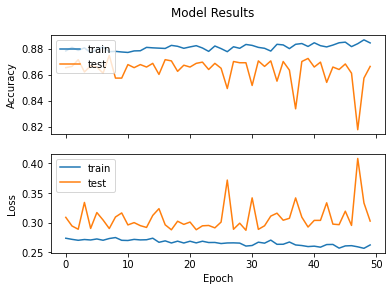

In [33]:
# Visualize the trainong results:
visualize_training_results(history)

In [34]:
# confusion matrix for hold-out set:
index=["Actual Malignant", "Actual Benign"]
columns=["Predicted Malignant", "Predicted Benign"]
predictions = model.predict_classes(hold_img)
cm = confusion_matrix(hold_y, predictions, labels=[0,1]) #, normalize='true')
display(pd.DataFrame(cm, index, columns))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,Predicted Malignant,Predicted Benign
Actual Malignant,67,122
Actual Benign,22,964


## Conclusion

We have 88% accuracy score for hold-out set. I will use SMOTE to upsample minority class and retrain neural network again in order to improve accuracy score of both train and test set.